<a href="https://colab.research.google.com/github/Nukaraju2003/Natural-Language-Processing/blob/main/Combined_Approch_Translation_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Working Combined Approch Using Facebook and MarianMT model**


1.   **facebook/nllb-200-distilled-1.3B** = Hindi to English Translation
2.   **Helsinki-NLP/opus-mt-en-hi** = English to Hindi Translation



In [ ]:
!pip install transformers datasets sentencepiece sacrebleu evaluate torch

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, MarianTokenizer, MarianMTModel
import warnings
warnings.filterwarnings("ignore")
from transformers import MarianMTModel, MarianTokenizer

##### Intitialize models and tokenizers


*   For the Hindi to englsih Translation.

*   Used - `facebook/nllb-200-distilled-1.3B`
*   Model - NLLB-200 i.e.  `NLLB-200's distilled 1.3B variant` is a machine translation model primarily intended for research in machine translation, - especially for low-resource languages. It allows for single sentence translation among 200 languages.







In [ ]:
tokenizer = AutoTokenizer.from_pretrained("facebook/nllb-200-distilled-1.3B")
model = AutoModelForSeq2SeqLM.from_pretrained("facebook/nllb-200-distilled-1.3B")

<hr> </hr>

*   For the English to Hindi Translation.

*   Used - `Helsinki-NLP/opus-mt-en-hi`
*   Model - English Hindi pair.

In [ ]:
helsinki_tokenizer = MarianTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-hi")
helsinki_model = MarianMTModel.from_pretrained("Helsinki-NLP/opus-mt-en-hi")

<hr> </hr>

##### **Hindi to English Translation Unsing NLLB**

In [ ]:
def hindi_to_english(text):
    # Get the target language code Usinf NLLB
    src_lang = "hi_Deva"  # hi_Deva fot the Hindi Language , NLLB Contains Hindi Devanagari script
    tgt_lang = "eng_Latn"  # eng_Latn fro English Language , NLLB Contains English Latin script

    # Preparing the tokenization from Source Language and Target Language
    tokenizer.src_lang = src_lang
    tokenizer.tgt_lang = tgt_lang

    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt", padding=True)

    # Generate the translation
    outputs = model.generate(**inputs, forced_bos_token_id=tokenizer.convert_tokens_to_ids(tgt_lang))

    # Decoding the tokenization into text
    translated_sentence = tokenizer.decode(outputs[0], skip_special_tokens=True)

    return translated_sentence


##### **English to Hindi Translation Unsing Helsinki**

In [ ]:
def english_to_hindi(text):
  #tokenization
  inputs = helsinki_tokenizer(text, return_tensors="pt", padding=True)
  #translation using tokenization
  outputs = helsinki_model.generate(**inputs)

  #Decoding the Tokenizer into text
  return helsinki_tokenizer.decode(outputs[0],skip_special_tokens=True)

##### **Definig the English and Hindi Text for Example.**

In [ ]:
hindi_text = "कालबैक फोन"
english_text = "I love reading books."

##### **Translating Hindi to English**

In [ ]:
translated_to_english = hindi_to_english(hindi_text)   # Calling the Function.
print("Hindi to English:", translated_to_english)

Hindi to English: Callback phone 


In [ ]:
translated_to_hindi = english_to_hindi(english_text)   # Calling the Function
print("English to Hindi:", translated_to_hindi)

English to Hindi: मैं किताबों को पढ़ने के लिए प्यार करता हूँ.


#### **Testing with Test Cases**

In [ ]:
!pip install tabulate

In [ ]:
from tabulate import tabulate
# Example test cases
test_cases = [
    {"input": "मुझे हिन्दी से अंग्रेजी में अनुवाद करना है।", "direction": "hindi_to_english"},
    {"input": "I want to translate from English to Hindi.", "direction": "english_to_hindi"},
    {"input": "मेरा नाम आज़ार है।", "direction": "hindi_to_english"},
    {"input": "My name is Azar.", "direction": "english_to_hindi"},
    {"input": "आप कैसे हैं?", "direction": "hindi_to_english"},
    {"input": "How are you?", "direction": "english_to_hindi"},
    {"input": "What is your name?", "direction": "english_to_hindi"},
    {"input": "India is Country of Many Languages and diverse culture", "direction": "english_to_hindi"},
    {"input": "कालबैक फोन", "direction": "hindi_to_english"}
]

In [ ]:
# Function to evaluate translations
def evaluate_translations(test_cases):
    results = []

    for case in test_cases:
        input_text = case["input"]
        direction = case["direction"]

        if direction == "hindi_to_english":
            output = hindi_to_english(input_text)
        elif direction == "english_to_hindi":
            output = english_to_hindi(input_text)
        else:
            output = "Invalid direction"

        results.append({
            "Input Text": input_text,
            "Direction": direction.replace("_", " ").title(),
            "Translated Output": output
        })

    return results

# Run evaluation
results = evaluate_translations(test_cases)

In [ ]:
# Display results in a table
print(tabulate(results, headers="keys", tablefmt="grid"))

+--------------------------------------------------------+------------------+--------------------------------------------+
| Input Text                                             | Direction        | Translated Output                          |
+========================================================+==================+============================================+
| मुझे हिन्दी से अंग्रेजी में अनुवाद करना है।                            | Hindi To English | I have to translate from Hindi to English. |
+--------------------------------------------------------+------------------+--------------------------------------------+
| I want to translate from English to Hindi.             | English To Hindi | मैं अंग्रेजी से हिन्दी अनुवाद करना चाहता हूँ.               |
+--------------------------------------------------------+------------------+--------------------------------------------+
| मेरा नाम आज़ार है।                                           | Hindi To English | My name is Azar.      

#### **Checking And Evaluating Belu Accuracy**

In [ ]:
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

In [ ]:
# Test cases with references
test_cases_bleu = [
    {
        "input": "मुझे हिन्दी से अंग्रेजी में अनुवाद करना है।",
        "reference": ["I have to translate from Hindi to English."],
        "direction": "hindi_to_english"
    },
    {
        "input": "I want to translate from English to Hindi.",
        "reference": ["मैं अंग्रेजी से हिंदी में अनुवाद करना चाहता हूं।"],
        "direction": "english_to_hindi"
    }
]

In [ ]:
# Evaluate BLEU scores
smoothie = SmoothingFunction().method4
results_bleu = []

for case in test_cases_bleu:
    input_text = case["input"]
    reference = [case["reference"][0].split()]
    direction = case["direction"]

    # Get the model output
    if direction == "hindi_to_english":
        candidate = hindi_to_english(input_text).split()
    elif direction == "english_to_hindi":
        candidate = english_to_hindi(input_text).split()
    else:
        candidate = []

    # Calculate BLEU score
    bleu_score = sentence_bleu(reference, candidate, smoothing_function=smoothie)

    results_bleu.append({
        "Input Text": input_text,
        "Direction": direction.replace("_", " ").title(),
        "Reference Translation": case["reference"][0],
        "Translated Output": " ".join(candidate),
        "BLEU Score": round(bleu_score, 4)
    })

In [ ]:
# Print results in table format
from tabulate import tabulate
print(tabulate(results_bleu, headers="keys", tablefmt="grid"))

+--------------------------------------------+------------------+--------------------------------------------+--------------------------------------------+--------------+
| Input Text                                 | Direction        | Reference Translation                      | Translated Output                          |   BLEU Score |
+============================================+==================+============================================+============================================+==============+
| मुझे हिन्दी से अंग्रेजी में अनुवाद करना है।                | Hindi To English | I have to translate from Hindi to English. | I have to translate from Hindi to English. |        1     |
+--------------------------------------------+------------------+--------------------------------------------+--------------------------------------------+--------------+
| I want to translate from English to Hindi. | English To Hindi | मैं अंग्रेजी से हिंदी में अनुवाद करना चाहता हूं।              |



> A BLEU score of 0 usually indicates a mismatch between the reference translation and the candidate translation being evaluated. It does not necessarily mean the translation is wrong—it may still be accurate but phrased differently. BLEU relies on n-gram overlap, so differences in phrasing can lead to low scores.



In [ ]:
# Test cases with references
test_cases_bleu = [
    {
        "input": "मुझे हिन्दी से अंग्रेजी में अनुवाद करना है।",
        "reference": ["I have to translate from Hindi to English."],
        "direction": "hindi_to_english"
    },
    {
        "input": "I want to translate from English to Hindi.",
        "reference": ["मैं अंग्रेजी से हिंदी में अनुवाद करना चाहता हूं।"],
        "direction": "english_to_hindi"
    },
    {
        "input": "मेरा नाम आज़ार है।",
        "reference": ["My name is Azar."],
        "direction": "hindi_to_english"
    },
    {
        "input": "My name is Azar.",
        "reference": ["मेरा नाम अज़ार है।"],
        "direction": "english_to_hindi"
    },
    {
        "input":"आपका दिन कैसा है?",
        "reference":["How is your day?"],
        "direction": "hindi_to_english"
    },
    {
        "input": "I am going to ground",
        "reference":["मैं ज़मीन पर जा रहा हूँ"],
        "direction": "english_to_hindi"
    },
    {
        "input": "I love reading books.",
        "reference": ["मुझे किताबें पढ़ना पसंद हैं।"],
        "direction": "english_to_hindi"
    },
    {
        "input":"It was good",
        "reference": ["यह अच्छा था"],
        "direction": "english_to_hindi"
    },
    {
        "input": "यहाँ बहुत अच्छा मौसम है।",
        "reference": ["The weather is very nice here."],
        "direction": "hindi_to_english"
    },
    {
        "input": "The cat is sleeping on the sofa.",
        "reference": ["बिल्ली सोफे पर सो रही है।"],
        "direction": "english_to_hindi"
    },
    {
        "input": "क्या आप मेरी मदद कर सकते हैं?",
        "reference": ["Can you help me?"],
        "direction": "hindi_to_english"
    },
    {
        "input": "I am learning Hindi.",
        "reference": ["मैं हिंदी सीख रहा हूं।"],
        "direction": "english_to_hindi"
    },
    {
        "input": "आपका दिन कैसा है? मुझे उम्मीद है कि यह अच्छा है।",
        "reference": ["How is your day? I hope it's good."],
        "direction": "hindi_to_english"
    },
    {
        "input": "यहाँ बहुत अच्छा मौसम है। मुझे यहाँ रहना पसंद है।",
        "reference": ["The weather is very nice here. I like it here."],
        "direction": "hindi_to_english"
    },
    {
        "input": "क्या आप मेरी मदद कर सकते हैं? मुझे थोड़ी सहायता चाहिए।",
        "reference": ["Can you help me? I need a little assistance."],
        "direction": "hindi_to_english"
    },
    {
        "input": "I am learning Hindi.",
        "reference": ["मैं हिंदी सीख रहा हूँ।"],
        "direction": "english_to_hindi"
    },
    {
        "input": "मैं हिंदी सीख रहा हूँ।.",
        "reference": ["I am learning Hindi."],
        "direction": "hindi_to_english"
    }
]

In [ ]:
# Function to calculate BLEU and prepare results
def evaluate_and_visualize_bleu(test_cases):
    smoothie = SmoothingFunction().method4
    results_bleu = []

    for case in test_cases:
        input_text = case["input"]
        reference = [case["reference"][0].split()]
        direction = case["direction"]

        # Get model output
        if direction == "hindi_to_english":
            candidate = hindi_to_english(input_text).split()
        elif direction == "english_to_hindi":
            candidate = english_to_hindi(input_text).split()
        else:
            candidate = []

        # Calculate BLEU score
        bleu_score = sentence_bleu(reference, candidate, smoothing_function=smoothie)

        results_bleu.append({
            "Input Text": input_text,
            "Direction": direction.replace("_", " ").title(),
            "Reference Translation": case["reference"][0],
            "Translated Output": " ".join(candidate),
            "BLEU Score": round(bleu_score, 4)
        })

    return results_bleu

In [ ]:
# Run evaluation
results_bleu = evaluate_and_visualize_bleu(test_cases_bleu)

In [ ]:
# Display results in a table
print(tabulate(results_bleu, headers="keys", tablefmt="grid"))

+--------------------------------------------+------------------+------------------------------------------------+------------------------------------------------+--------------+
| Input Text                                 | Direction        | Reference Translation                          | Translated Output                              |   BLEU Score |
+============================================+==================+================================================+================================================+==============+
| मुझे हिन्दी से अंग्रेजी में अनुवाद करना है।                | Hindi To English | I have to translate from Hindi to English.     | I have to translate from Hindi to English.     |       1      |
+--------------------------------------------+------------------+------------------------------------------------+------------------------------------------------+--------------+
| I want to translate from English to Hindi. | English To Hindi | मैं अंग्रेजी से हिंदी म

#### **Evolution Using Bleu , rouge_score , Ter , meteor score**

In [ ]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from tabulate import tabulate
from rouge_score import rouge_scorer
from nltk.translate.meteor_score import meteor_score
from sacrebleu.metrics import TER

# Define the calculate_rouge function
def calculate_rouge(ref_tokens, cand_tokens):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
    scores = scorer.score(' '.join(ref_tokens), ' '.join(cand_tokens))
    return {
        "ROUGE-1": round(scores['rouge1'].fmeasure, 4),
        "ROUGE-L": round(scores['rougeL'].fmeasure, 4)
    }


# Define the calculate_meteor function
def calculate_meteor(ref_tokens, cand_tokens):
    return round(meteor_score([ref_tokens], cand_tokens), 4)


# Define the calculate_ter function
def calculate_ter(ref_tokens, cand_tokens):
    # Change: Join the candidate tokens to form a single string.
    cand_string = ' '.join(cand_tokens)
    # Pass the candidate string and a list containing the reference string to corpus_score.
    return round(TER().corpus_score([cand_string], [[' '.join(ref_tokens)]]).score, 4)


In [ ]:
def evaluate_metrics(reference, candidate):
    # Tokenize reference and candidate
    ref_tokens = reference.split()
    cand_tokens = candidate.split()

    # BLEU Score
    smoothie = SmoothingFunction().method4
    bleu = round(sentence_bleu([ref_tokens], cand_tokens, smoothing_function=smoothie), 4)

    # ROUGE
    rouge = calculate_rouge(ref_tokens, cand_tokens)

    # METEOR
    meteor = calculate_meteor(ref_tokens, cand_tokens)

    # TER
    ter = calculate_ter(ref_tokens, cand_tokens)

    # Combine all metrics
    return {
        "BLEU": bleu,
        **rouge,
        "METEOR": meteor,
        "TER": ter
    }


In [ ]:
# Example: Evaluate translations
test_cases_metrics = [
    {
        "input": "मुझे हिन्दी से अंग्रेजी में अनुवाद करना है।",
        "reference": "I have to translate from Hindi to English.",
        "direction": "hindi_to_english",
        "candidate": hindi_to_english("मुझे हिन्दी से अंग्रेजी में अनुवाद करना है।")
    },
    {
        "input": "I want to translate from English to Hindi.",
        "reference": "मैं अंग्रेजी से हिंदी में अनुवाद करना चाहता हूं।",
        "direction": "english_to_hindi",
        "candidate": english_to_hindi("I want to translate from English to Hindi.")
    }
]


In [ ]:
# Compute metrics for each case
results_metrics = []
for case in test_cases_metrics:
    metrics = evaluate_metrics(case["reference"], case["candidate"])
    results_metrics.append({
        "Input Text": case["input"],
        "Direction": case["direction"].replace("_", " ").title(),
        "Reference": case["reference"],
        "Candidate": case["candidate"],
        **metrics
    })


In [ ]:
# Display results
print(tabulate(results_metrics, headers="keys", tablefmt="grid"))

+--------------------------------------------+------------------+--------------------------------------------+--------------------------------------------+--------+-----------+-----------+----------+---------+
| Input Text                                 | Direction        | Reference                                  | Candidate                                  |   BLEU |   ROUGE-1 |   ROUGE-L |   METEOR |     TER |
+============================================+==================+============================================+============================================+========+===========+===========+==========+=========+
| मुझे हिन्दी से अंग्रेजी में अनुवाद करना है।                | Hindi To English | I have to translate from Hindi to English. | I have to translate from Hindi to English. |  1     |         1 |         1 |   0.999  |  0      |
+--------------------------------------------+------------------+--------------------------------------------+----------------------------------

#### **Visualizing the Matrics**

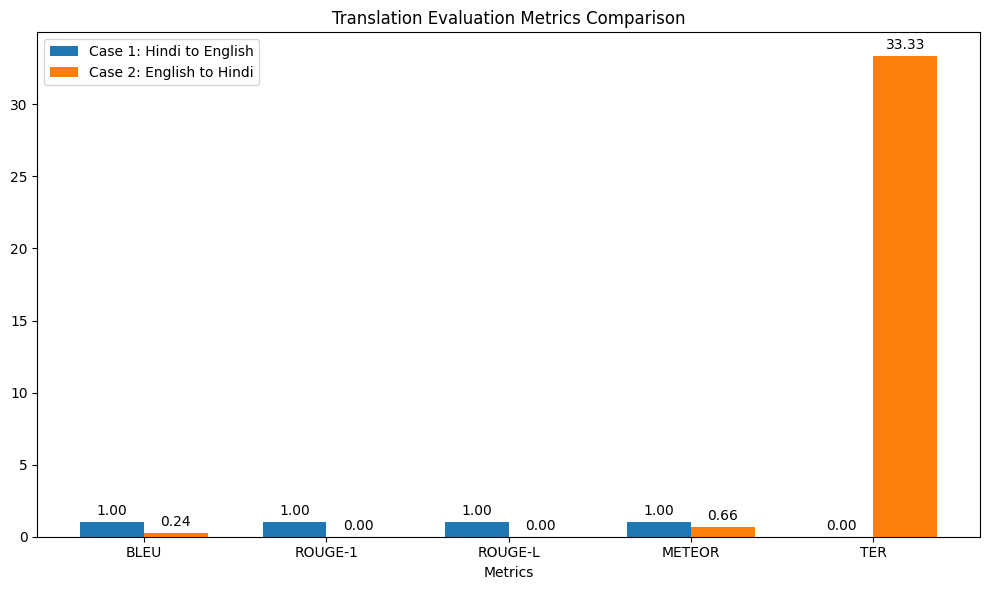

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data from the table
metrics = ['BLEU', 'ROUGE-1', 'ROUGE-L', 'METEOR', 'TER']
scores_case_1 = [1.0, 1.0, 1.0, 0.999, 0.0]  # Perfect translation
scores_case_2 = [0.245, 0.0, 0.0, 0.6617, 33.33]  # Mismatched translation

# Prepare data for plotting
x = np.arange(len(metrics))  # The label locations
width = 0.35  # The width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for each case
rects1 = ax.bar(x - width/2, scores_case_1, width, label='Case 1: Hindi to English')
rects2 = ax.bar(x + width/2, scores_case_2, width, label='Case 2: English to Hindi')

# Add some text for labels, title and custom x-axis tick labels
ax.set_xlabel('Metrics')
ax.set_title('Translation Evaluation Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Add the numeric labels above the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

fig.tight_layout()

# Show plot
plt.show()
